In [ ]:
# 20220913
# https://ndb796.tistory.com/373?category=1011147
# pytorch 나만의 데이터셋을 만들고, 이를 ImageFolder로 불러오기

In [12]:
# 데이터셋을 직접 구축, 만든 데이터셋으로 직접 학습 : ImageFolder 라이브러리
# 각 이미지들이 자신의 레이블 이름으로 된( 라벨 이름이 폴더 명이면) ImageFolder 라이브러리를 이용하여 바로 객체로 만들면 됨 

# 기본적으로 제공하고 있는 CIFAR10 데이터셋 불러오기
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np

transform_train = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.CIFAR10(
    root = './data',
    train = True,
    download = True,
    transform = transform_train
)

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = 128,
    shuffle = True,
    num_workers = 4
)

Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [20]:
# CIFAR10 의 경우에는 10개의 레이블로 구성된 데이터셋이므로, 각 레이블의 이미지가 몇 번 등장했는지를 기록해주는 변수를 선언

import os
num_classes = 10
number_per_classes = {}

for i in range(num_classes):
  number_per_classes[i]=0

# 이미지 torch 객체와 레이블 정수 값이 들어왔을 때, 실제 폴더에 저장해주는 함수 작성
def custom_imsave(img, label):
  path = 'dataset/' + str(label) + '/'
  if not os.path.exists(path):
    os.makedirs(path)

  img = img.numpy()
  img = np.transpose(img, (1, 2, 0))
  image.imsave(path + str(number_per_classes[label]) + '.jpg', img)
  number_per_classes[label] += 1

In [21]:
# 데이터를 배치 단위로 읽으며, 배치 단위에 포함된 각 이미지를 하나씩 정확한 폴더에 지정

def process():
  for batch_idx, (inputs, targets) in enumerate(train_loader):
    print("[ Current Batch Index: " + str(batch_idx) + "]")
    for i in range(inputs.size(0)):
      custom_imsave(inputs[i], targets[i].item())

In [22]:
process()

[ Current Batch Index: 0]
[ Current Batch Index: 1]
[ Current Batch Index: 2]
[ Current Batch Index: 3]
[ Current Batch Index: 4]
[ Current Batch Index: 5]
[ Current Batch Index: 6]
[ Current Batch Index: 7]
[ Current Batch Index: 8]
[ Current Batch Index: 9]
[ Current Batch Index: 10]
[ Current Batch Index: 11]
[ Current Batch Index: 12]
[ Current Batch Index: 13]
[ Current Batch Index: 14]
[ Current Batch Index: 15]
[ Current Batch Index: 16]
[ Current Batch Index: 17]
[ Current Batch Index: 18]
[ Current Batch Index: 19]
[ Current Batch Index: 20]
[ Current Batch Index: 21]
[ Current Batch Index: 22]
[ Current Batch Index: 23]
[ Current Batch Index: 24]
[ Current Batch Index: 25]
[ Current Batch Index: 26]
[ Current Batch Index: 27]
[ Current Batch Index: 28]
[ Current Batch Index: 29]
[ Current Batch Index: 30]
[ Current Batch Index: 31]
[ Current Batch Index: 32]
[ Current Batch Index: 33]
[ Current Batch Index: 34]
[ Current Batch Index: 35]
[ Current Batch Index: 36]
[ Current B

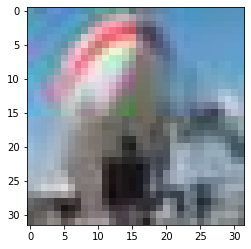

In [23]:
# 0번 레이블(비행기)의 첫 번째 이비지를 출력
from PIL import Image 
from matplotlib.pyplot import imshow

img = Image.open('dataset/0/0.jpg')
imshow(np.asarray(img))

In [28]:
# ImageFolder 라이브러리를 사용하여 저장한 이미지들을 이용해 pytorch 데이터셋 객체로 불러올 수 있는지 확인
from torchvision.datasets import ImageFolder

train_dataset = ImageFolder(
    root = './dataset',
    transform = transform_train
)

train_loader = torch.utils.data.DataLoader(
     train_dataset,
     batch_size = 128,
     shuffle = True,
     num_workers = 4
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


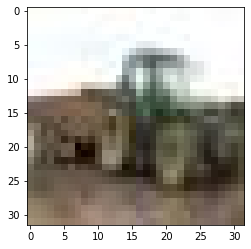

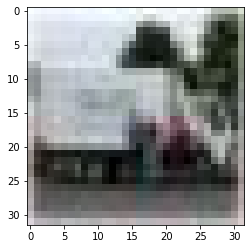

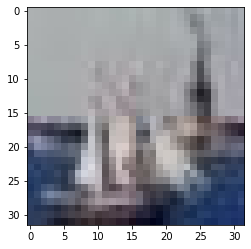

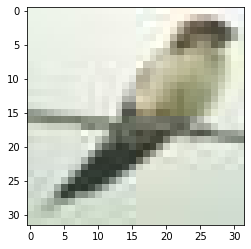

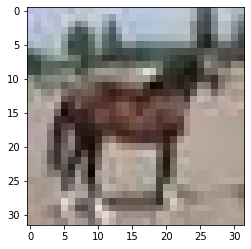

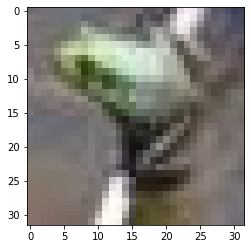

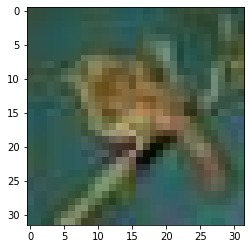

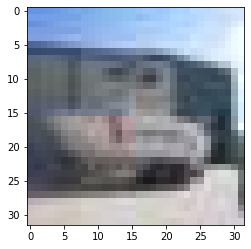

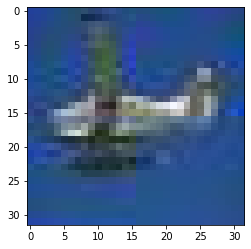

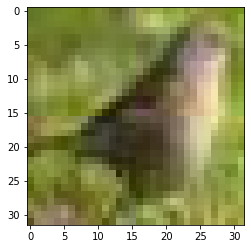

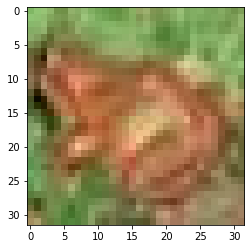

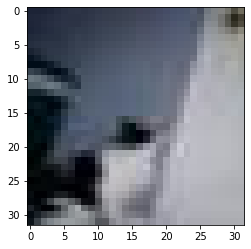

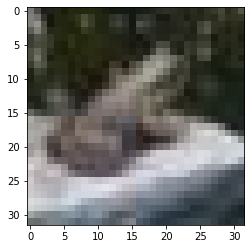

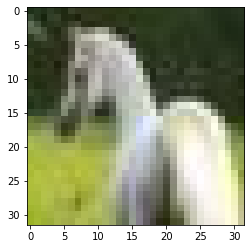

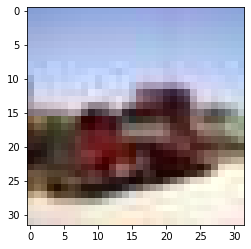

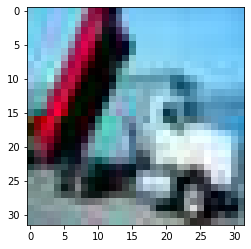

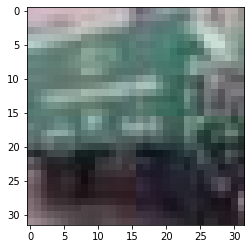

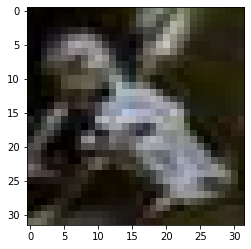

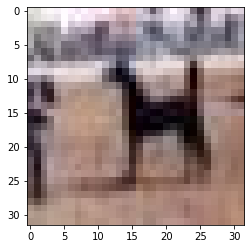

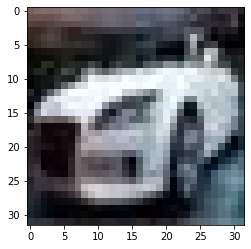

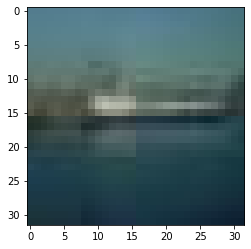

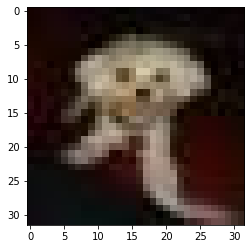

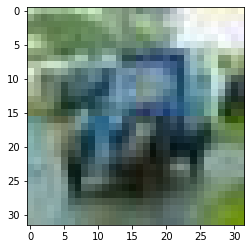

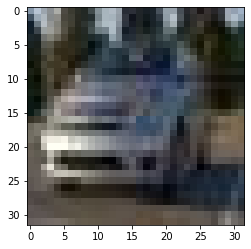

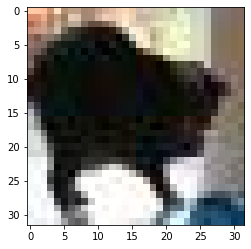

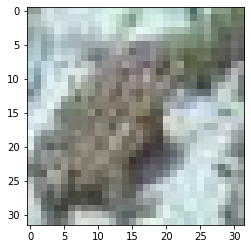

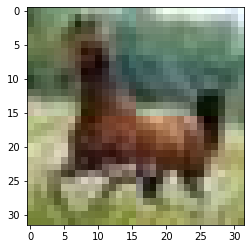

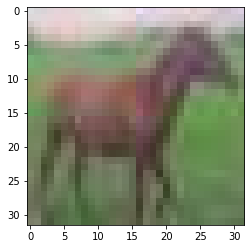

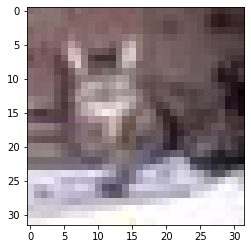

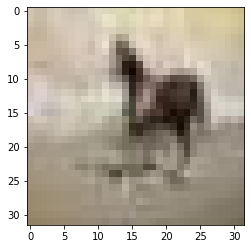

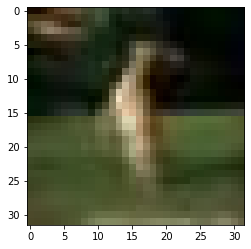

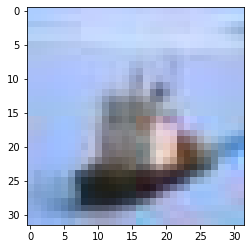

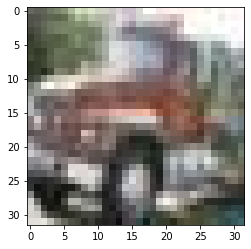

KeyboardInterrupt: ignored

In [30]:
# pytorch 구조에서 matplotlib.pyplot구조로 바꾸기
# [batch_size , channel, width, height]  = > [width, height, channel]


# 이미지 출력용 함수
def custom_imshow(img):
  img = img.numpy()
  plt.imshow(np.transpose(img, (1, 2, 0)))
  plt.show()

# 이미지를 하나씩 출력
def process():
  for batch_idx, (inputs, targets) in enumerate(train_loader):
    custom_imshow(inputs[0])

# dataset의 구성 파악
process()